# **4 Clustering (Yi)**

**4.1**

Loading plotting the data set

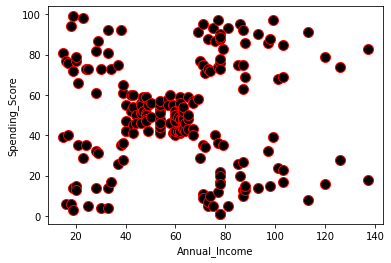

In [504]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('mall_customers.csv')
plt.scatter(data.iloc[:, 0], data.iloc[:, 1],
            s=100, c='k', linewidths=1, edgecolors='r')
plt.xlabel(f'{data.columns[0]}')
plt.ylabel(f'{data.columns[1]}')
plt.show()

**4.2**

Implementation of the k-means algorithm

In [505]:
# Distance between 2 points
def distance_between_points(point1, point2, order=2):
    return np.sum(np.abs(point1-point2) ** order) ** (1. / order)

# selecting random centers from the data
def centers_from_data(data, k):
    rand_ind = np.random.randint(len(data), size=k)
    return data[rand_ind, :]

# finding the avg point in every cluster
def centers_new(clusters):
    centers = []
    for cluster in clusters:
        centers.append(np.average(np.array(cluster), axis=0))
    return np.array(centers)

# k-means algorithm implementation
def k_means(data, k, error=0.01,
            centers_alg=centers_new,
            distance_alg=distance_between_points, **kwargs):
    data = np.array(data)
    cost_old = np.infty
    centers = centers_from_data(data, k)
    while True:
        clusters = [[] for i in range(k)]
        cost = 0
        for x in data:
            distances = np.array([
                distance_alg(x, c, **kwargs) for c in centers
            ])
            arg_min = distances.argmin()
            cost += distances[arg_min]
            clusters[arg_min].append(x)
        # check if there is an empty cluster
        # if so, assigning a random point to this center
        for i, cluster in enumerate(clusters):
            if len(cluster) == 0:
                clusters[i] = data[np.random.randint(len(data), size=1), :]
                print('cluster is empty')
                break
        centers = centers_alg(clusters)
        if np.abs(cost - cost_old) < error:
            # returning centers and clusters
            return centers, clusters
        else:
            cost_old = cost

Plotting clusters and their centers. The number of clusters was chosen equal to 5.

The Center group probably represents an ordinary average customer. The top left group is the people
who spend more than they can afford so they are probably in debt. The bottom left and right groups
probably saving money. The top right group represents rich people who spend a lot.

Centers coordinates:
 [[26.30434783 20.91304348]
 [88.2        17.11428571]
 [86.53846154 82.12820513]
 [25.72727273 79.36363636]
 [55.2962963  49.51851852]]


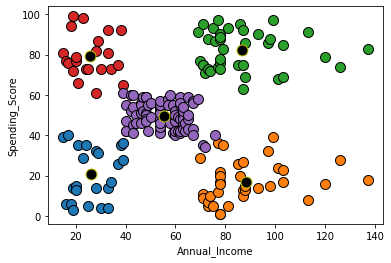

In [563]:
centers, clusters = k_means(data, k=5, error=0.0001)
for cluster in clusters:
    cluster = np.array(cluster)
    plt.scatter(cluster[:, 0], cluster[:, 1],
                s=100, linewidths=1, edgecolors='k')
plt.scatter(centers[:, 0], centers[:, 1],
            s=120, c='k', linewidths=1, edgecolors='y')
print(f'Centers coordinates:\n {centers}')
plt.xlabel(f'{data.columns[0]}')
plt.ylabel(f'{data.columns[1]}')
plt.show()

**4.3**

Using KMeans in sklearn. The centers and clusters are exactly the same up.
However, their algorithm less often finds other local minima. Probably their way to
initiate the centers is something different than just selecting 5 random points.

Centers coordinates:
 [[55.2962963  49.51851852]
 [88.2        17.11428571]
 [26.30434783 20.91304348]
 [86.53846154 82.12820513]
 [25.72727273 79.36363636]]


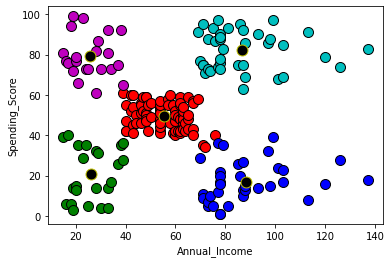

In [507]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, random_state=np.random.randint(1e5)).fit(data)
centers = kmeans.cluster_centers_
predict = kmeans.predict(data)
colors = ['r', 'b', 'g', 'c', 'm']
for i, dot in enumerate(np.array(data)):
    cluster_ind = predict[i]
    plt.scatter(dot[0], dot[1],
            s=100, c=colors[cluster_ind], linewidths=1, edgecolors='k')
plt.scatter(centers[:, 0], centers[:, 1],
            s=120, c='k', linewidths=1, edgecolors='y')
print(f'Centers coordinates:\n {centers}')
plt.xlabel(f'{data.columns[0]}')
plt.ylabel(f'{data.columns[1]}')
plt.show()

In order to implement the k-median algorithm, we need to change the metric in our k-mean
function to 1-norm and also change the way we determine new centers of each cluster to
the median value instead of the mean value.

Metrics can be change but changing the order value in my function distance_between_points.
The median is implemented below.

Centers coordinates:
 [[79.  83. ]
 [80.  16.5]
 [54.  50. ]
 [24.  15. ]
 [24.5 77. ]]


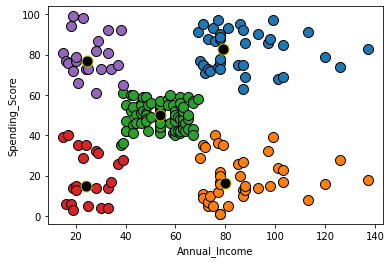

In [558]:
def centers_median(clusters):
    centers = []
    for cluster in clusters:
        centers.append(np.median(np.array(cluster), axis=0))
    return np.array(centers)

Now, let's try our k-median algorithm and compare it to the k-mean.

Coordinates of the centers are different (because now they are median values, not mean values
of clusters).

We can also see that clusters are a little bit different compared to k-mean. For example,
the bottom right corner of the central cluster has extra 3 dots from the bottom right cluster in
the k-mean solution.

Centers coordinates:
 [[24.5 77. ]
 [79.  83. ]
 [80.  16.5]
 [54.  50. ]
 [24.  15. ]]


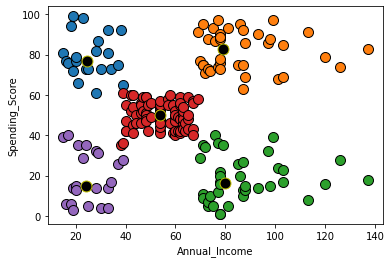

In [560]:
centers, clusters = k_means(
    data, k=5, error=0.01,centers_alg=centers_median,
    distance_alg=lambda x, y: distance_between_points(x, y, order=1)
)
for cluster in clusters:
    cluster = np.array(cluster)
    plt.scatter(cluster[:, 0], cluster[:, 1],
                s=100, linewidths=1, edgecolors='k')
plt.scatter(centers[:, 0], centers[:, 1],
            s=120, c='k', linewidths=1, edgecolors='y')
print(f'Centers coordinates:\n {centers}')
plt.xlabel(f'{data.columns[0]}')
plt.ylabel(f'{data.columns[1]}')
plt.show()